# Training a perceptron model on the Iris dataset

In [1]:
import numpy as np
class Perceptron(object):
    
    def __init__(self, exilon, num_iters):
        """
        :param: exilon: learning rate
                num_iters: Number of epochs
        """
        self.exilon = exilon
        self.num_iters = num_iters
    
    def fit(self, X, y):
        """
        fit training data
        :param
            X:Training vector , shape=[batch_size, feature_size]
            y: Target vector, shape=[batch_size]
        :return
        """
        shape = X.shape
        X_train = np.append(np.ones((shape[0], 1)), X, axis=1)
        self._w = np.zeros(X_train.shape[1])
        self.errors = []
        for _ in range(self.num_iters):
            err = 0
            for Xi, target in zip(X_train, y):
                update = self.exilon * (target - self.predict(Xi))
                self._w += update * Xi
                err += int(update != 0.0)
            self.errors.append(err)
        return self
    
    def predict(self, Xi):
        """
        Return class label after unit ste
        :param
            Xi: a sample of feature, shape=[feature]
        :return
        """
        cal = np.dot(Xi, self._w)
        return np.where(cal >= 0.0, 1, -1)

In [2]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()
df.size

750

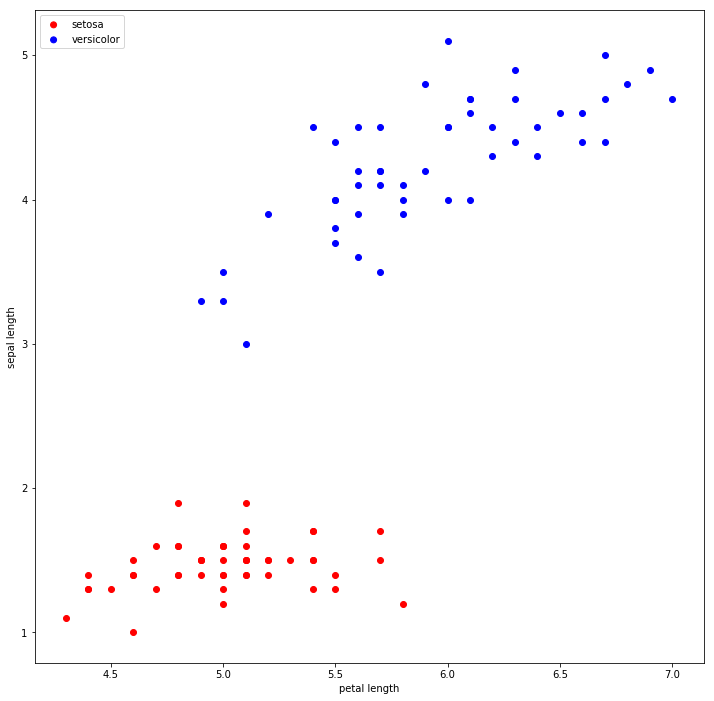

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 
width = 12
height = 12
plt.figure(figsize=(width, height))
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 1, -1)
X = df.iloc[0:100, [0,2]].values
plt.scatter(X[:50, 0], X[:50, 1],
          color='red', marker="o", label="setosa")
plt.scatter(X[50:100, 0], X[50:100, 1],
          color="blue", marker='o', label="versicolor")
plt.xlabel("petal length")
plt.ylabel("sepal length")
plt.legend(loc="upper left")
plt.show()

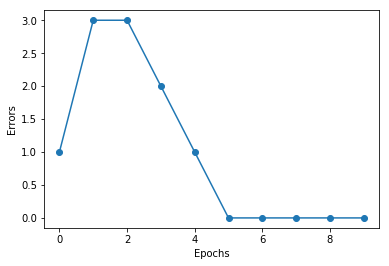

In [4]:
ppn = Perceptron(0.1, 10)
ppn.fit(X, y)
plt.plot(range(len(ppn.errors)), ppn.errors,
        marker="o")
plt.xlabel("Epochs")
plt.ylabel("Errors")
plt.show()

In [5]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), #like zip()
    np.arange(x2_min, x2_max, resolution))
    tmp = np.array([xx1.ravel(), xx2.ravel()]).T
    Z = classifier.predict(np.append(np.ones((tmp.shape[0], 1)), tmp, axis=1))
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)

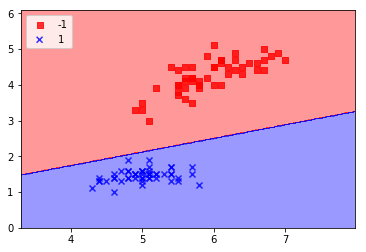

In [33]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel = ['sepal length']
plt.ylabel = ['petal length']
plt.legend(loc='upper left')
width = 12
height = 12
plt.figure(figsize=(width, height))
plt.show()

# Adaptive linear neurons and the convergence of learning

In [6]:
class AdapGD(object):
    
    def __init__(self, exilon, num_iters):
        self.exilon = exilon
        self.num_iters = num_iters
    
    def fit(self, X, y):
        """
        fit weight vector
        :param
            X - training vector, shape= [num samples, num features]
            y - target vector, shape= [num samples]
        :return
        """
        X_train = np.append(np.ones((X.shape[0], 1)), X, axis=1)
        self.w = np.zeros(X_train.shape[1])
        self.cost = []
        
        for _ in np.arange(self.num_iters):
            y_predict = self.net_input(X_train)
            err = y - y_predict
            self.w += self.exilon * X_train.T.dot(err)
            cost = 1 / 2 * (err ** 2).sum()
            self.cost.append(cost)
            
        return self
    
    def net_input(self, X):
        """
        return net input"""
        return np.dot(X, self.w)
    
    def activation(self, X):
        X_predict =  np.append((np.ones(X.shape[0], 1)), X, axis=1)
        return self.net_input(X_predict)
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

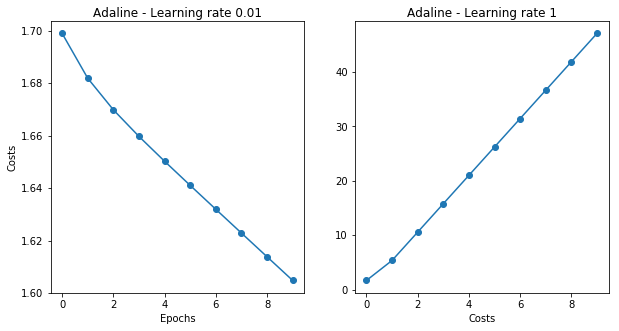

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ada1 = AdapGD(0.0001, 10).fit(X, y)
ax[0].plot(range(len(ada1.cost)), np.log10(ada1.cost),
           marker="o")
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Costs')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2 = AdapGD(0.1, 10).fit(X, y)
ax[1].plot(range(len(ada2.cost)), np.log10(ada2.cost),
          marker="o")
ax[1].set_xlabel('Epochs')
ax[1].set_xlabel('Costs')
ax[1].set_title('Adaline - Learning rate 1')
plt.show()

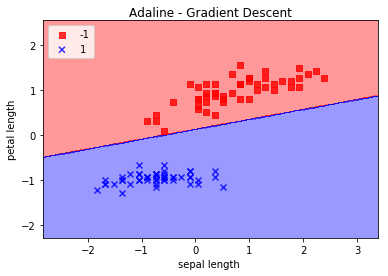

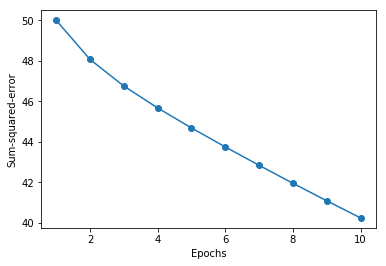

In [7]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
ada = AdapGD(0.0001, 10)
ada.fit(X, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel("sepal length ")
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost) + 1), ada.cost, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

In [21]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
    Learning rate (between 0.0 and 1.0)
    n_iter : int
    Passes over the training dataset.
    Attributes
    -----------
    w_ : 1d-array
    Weights after fitting.
    errors_ : list
    Number of misclassifications in every epoch.
    shuffle : bool (default: True)
    Shuffles training data every epoch
    if True to prevent cycles.
    random_state : int (default: None)
    Set random state for shuffling
    and initializing the weights.
    """
    def __init__(self, eta=0.01, n_iter=10,
        shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        
        if random_state:
            np.random.seed(random_state)
    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
        Training vectors, where n_samples
        is the number of samples and
        n_features is the number of features.
        y : array-like, shape = [n_samples]
        Target values.
        Returns
        -------
        self : object
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            X_train = np.append(np.ones((X.shape[0], 1)), X, axis=1)
            for xi, target in zip(X_train, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):

        """Initialize weights to zeros"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
    
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_ += self.eta * xi.dot(error)
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_)
    
    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)
    

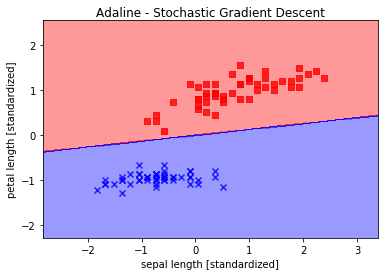

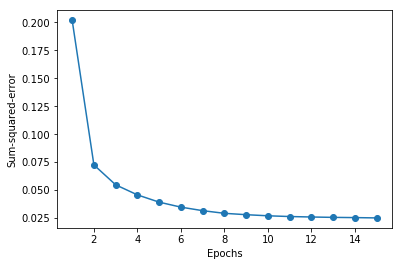

In [25]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()